## 範例重點
* 了解如何 reset Tensorflow Graph
* 學習如何以迴圈方式訓練不同超參數的模型
* 學習如何以迴圈方式繪圖

In [1]:
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [7]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

Epoch 49/50
50000/50000 [==============================] - 5s 107us/step - loss: 2.3040 - accuracy: 0.1006 - val_loss: 2.3042 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 5s 107us/step - loss: 2.3044 - accuracy: 0.1002 - val_loss: 2.3037 - val_accuracy: 0.1000
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_____________________________________________________________

Epoch 47/50
50000/50000 [==============================] - 5s 107us/step - loss: 0.4170 - accuracy: 0.8510 - val_loss: 2.0774 - val_accuracy: 0.5287
Epoch 48/50
50000/50000 [==============================] - 5s 105us/step - loss: 0.4179 - accuracy: 0.8500 - val_loss: 2.3588 - val_accuracy: 0.5076
Epoch 49/50
50000/50000 [==============================] - 5s 107us/step - loss: 0.3984 - accuracy: 0.8572 - val_loss: 2.1571 - val_accuracy: 0.5217
Epoch 50/50
50000/50000 [==============================] - 5s 106us/step - loss: 0.3919 - accuracy: 0.8586 - val_loss: 2.2516 - val_accuracy: 0.5250
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
___________________________

Epoch 45/50
50000/50000 [==============================] - 5s 102us/step - loss: 0.9404 - accuracy: 0.6685 - val_loss: 1.6407 - val_accuracy: 0.4820
Epoch 46/50
50000/50000 [==============================] - 5s 102us/step - loss: 0.9303 - accuracy: 0.6720 - val_loss: 1.3867 - val_accuracy: 0.5304
Epoch 47/50
50000/50000 [==============================] - 5s 103us/step - loss: 0.9142 - accuracy: 0.6787 - val_loss: 1.3721 - val_accuracy: 0.5271
Epoch 48/50
50000/50000 [==============================] - 5s 104us/step - loss: 0.9057 - accuracy: 0.6830 - val_loss: 1.4024 - val_accuracy: 0.5248
Epoch 49/50
50000/50000 [==============================] - 5s 102us/step - loss: 0.8908 - accuracy: 0.6887 - val_loss: 1.4237 - val_accuracy: 0.5199
Epoch 50/50
50000/50000 [==============================] - 5s 103us/step - loss: 0.8824 - accuracy: 0.6905 - val_loss: 1.4077 - val_accuracy: 0.5302
Experiment with LR = 0.000100
Model: "model_1"
___________________________________________________________

Epoch 43/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.5903 - accuracy: 0.4459 - val_loss: 1.5947 - val_accuracy: 0.4427
Epoch 44/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.5853 - accuracy: 0.4468 - val_loss: 1.5948 - val_accuracy: 0.4462
Epoch 45/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.5805 - accuracy: 0.4500 - val_loss: 1.5888 - val_accuracy: 0.4414
Epoch 46/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.5755 - accuracy: 0.4504 - val_loss: 1.5856 - val_accuracy: 0.4473
Epoch 47/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.5716 - accuracy: 0.4516 - val_loss: 1.5797 - val_accuracy: 0.4475
Epoch 48/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.5663 - accuracy: 0.4532 - val_loss: 1.5756 - val_accuracy: 0.4512
Epoch 49/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.5619 - accuracy: 0.4549

Epoch 41/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.9734 - accuracy: 0.3119 - val_loss: 1.9701 - val_accuracy: 0.3139
Epoch 42/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.9692 - accuracy: 0.3138 - val_loss: 1.9661 - val_accuracy: 0.3157
Epoch 43/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.9651 - accuracy: 0.3141 - val_loss: 1.9622 - val_accuracy: 0.3185
Epoch 44/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.9612 - accuracy: 0.3178 - val_loss: 1.9584 - val_accuracy: 0.3197
Epoch 45/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.9573 - accuracy: 0.3188 - val_loss: 1.9548 - val_accuracy: 0.3218
Epoch 46/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.9536 - accuracy: 0.3196 - val_loss: 1.9512 - val_accuracy: 0.3239
Epoch 47/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.9500 - accuracy: 0.3213

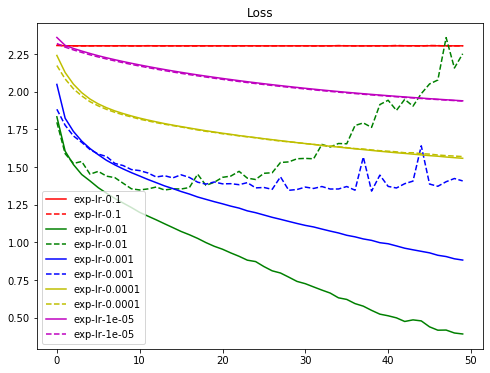

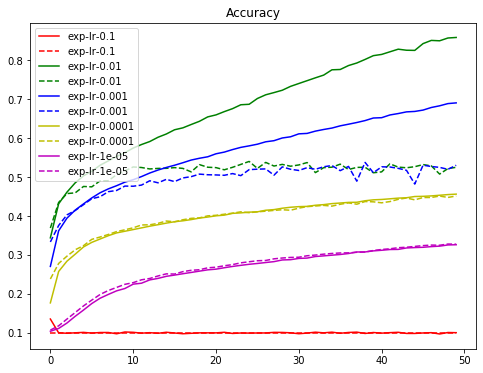

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現